# EDA

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('./data/measurements.csv')
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [3]:
data2 = pd.read_excel('./data/measurements2.xlsx')
data2.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [4]:
data.columns == data2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [5]:
data.shape == data2.shape

True

## Cleaning column names

In [6]:
import cleaning_functions as functions

In [7]:
data = functions.standardize_column_names(data)
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


## Cleaning invalid values

In [8]:
display(data['specials'].unique())
display(data['gas_type'].unique())
display(data['ac'].unique())
display(data['rain'].unique())
display(data['sun'].unique())
display(data['refill_gas'].unique())

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

array(['E10', 'SP98'], dtype=object)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

array(['E10', nan, 'SP98'], dtype=object)

In [9]:
data = functions.normalize_column_values(data, 'specials', {'sun ac': 'AC sun', 'AC Sun': 'AC sun', 'ac': 'AC', 'ac rain': 'AC rain'})
data['specials'].unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun'], dtype=object)

## Formatting data types

In [10]:
data.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
ac                int64
rain              int64
sun               int64
refill_liters    object
refill_gas       object
dtype: object

In [11]:
column_list = ['distance','consume','temp_inside', 'refill_liters']
for col in column_list:
    data[col] = data[col].str.replace(',','.').astype(float)
data.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
ac                 int64
rain               int64
sun                int64
refill_liters    float64
refill_gas        object
dtype: object

## Dealing with null values

In [12]:
data.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
ac                 0
rain               0
sun                0
refill_liters    375
refill_gas       375
dtype: int64

In [13]:
data.isnull().sum()/len(data)

distance         0.000000
consume          0.000000
speed            0.000000
temp_inside      0.030928
temp_outside     0.000000
specials         0.760309
gas_type         0.000000
ac               0.000000
rain             0.000000
sun              0.000000
refill_liters    0.966495
refill_gas       0.966495
dtype: float64

In [14]:
data.drop(['specials','refill_liters','refill_gas'], axis=1, inplace=True)

In [15]:
data.shape

(388, 9)

In [16]:
data.dropna(how='all',inplace=True)
data.shape

(388, 9)

In [17]:
data.isnull().sum()/len(data)

distance        0.000000
consume         0.000000
speed           0.000000
temp_inside     0.030928
temp_outside    0.000000
gas_type        0.000000
ac              0.000000
rain            0.000000
sun             0.000000
dtype: float64

In [18]:
mode = data['temp_inside'].mode()
mode[0]

21.5

In [19]:
data.fillna(mode[0], inplace=True)

In [20]:
data.isnull().sum()/len(data)

distance        0.0
consume         0.0
speed           0.0
temp_inside     0.0
temp_outside    0.0
gas_type        0.0
ac              0.0
rain            0.0
sun             0.0
dtype: float64

## Dealing with duplicates

In [21]:
data.duplicated().value_counts()

False    388
dtype: int64

## New columns

In [22]:
data['temp_diff'] = data['temp_inside'] - data['temp_outside']
data['trip_consume'] = data['consume']/100*data['distance']
data['trip_cost'] = data.apply(lambda x: x['trip_consume']*1.38 if x['gas_type']=='E10' else x['trip_consume']*1.46, axis=1)
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun,temp_diff,trip_consume,trip_cost
0,28.0,5.0,26,21.5,12,E10,0,0,0,9.5,1.4000,1.932000
1,12.0,4.2,30,21.5,13,E10,0,0,0,8.5,0.5040,0.695520
2,11.2,5.5,38,21.5,15,E10,0,0,0,6.5,0.6160,0.850080
3,12.9,3.9,36,21.5,14,E10,0,0,0,7.5,0.5031,0.694278
4,18.5,4.5,46,21.5,15,E10,0,0,0,6.5,0.8325,1.148850


In [23]:
data.to_csv('clean_data.csv', index=False)

## Data visualization

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
numerical = data.select_dtypes(include=np.number)

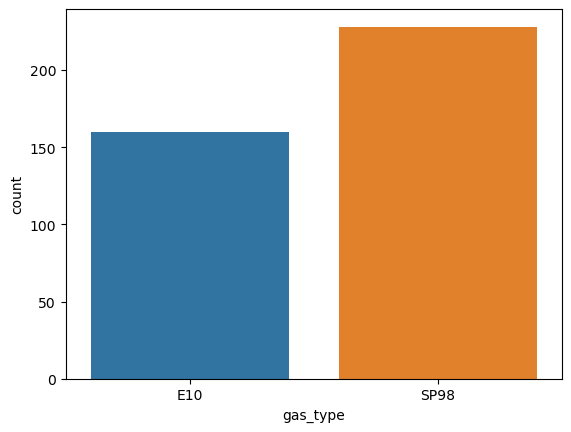

In [26]:
fig,ax = plt.subplots()
sns.countplot(x=data['gas_type'])
plt.show()

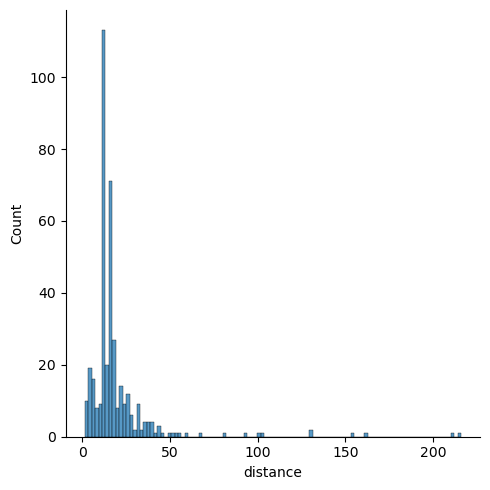

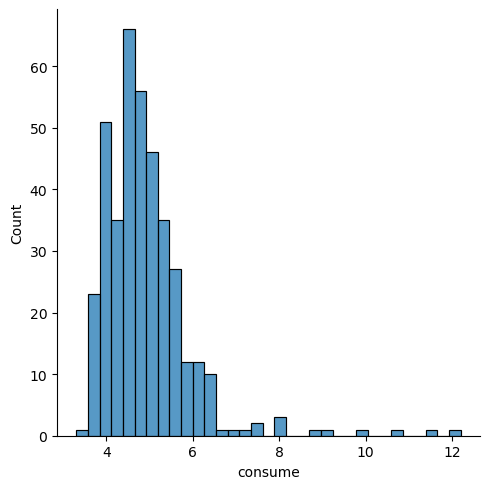

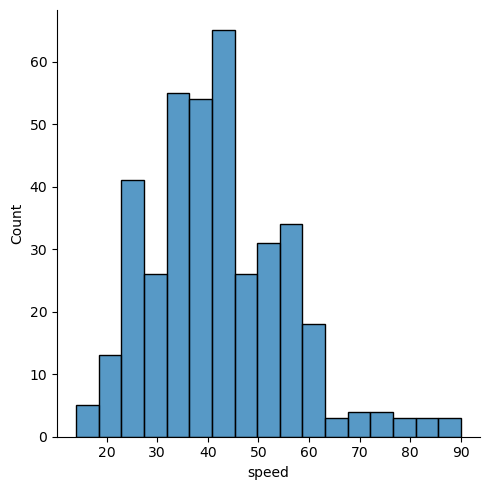

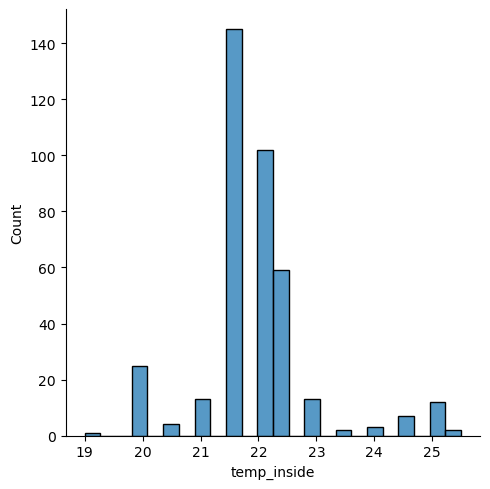

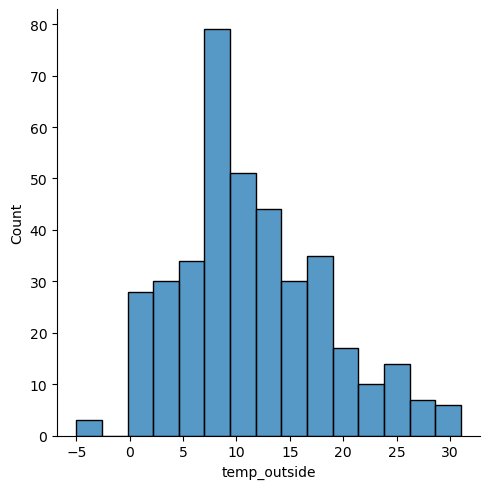

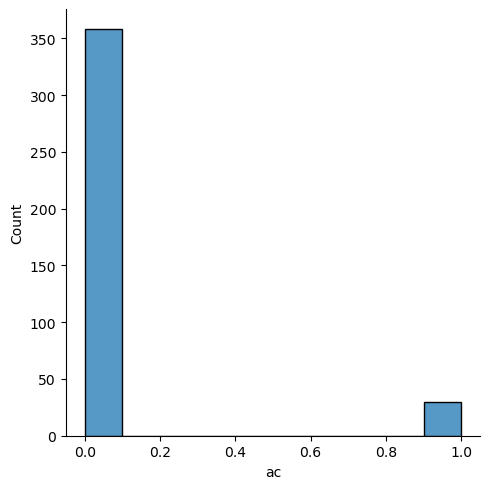

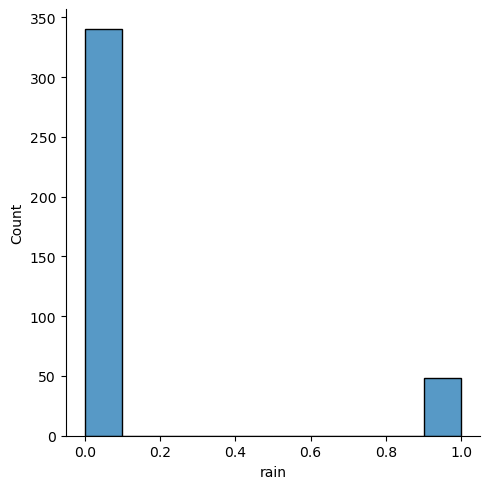

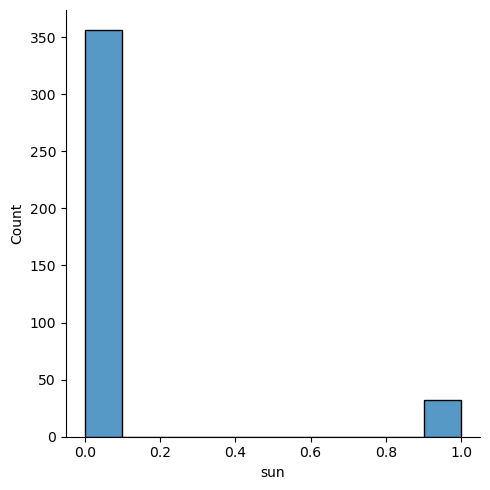

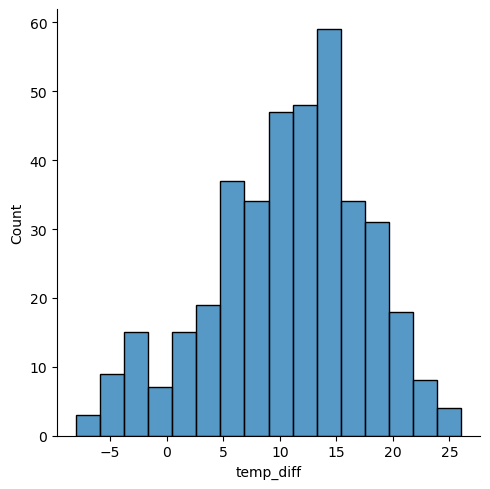

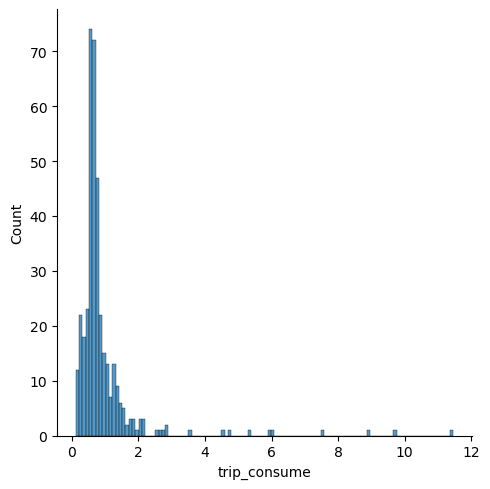

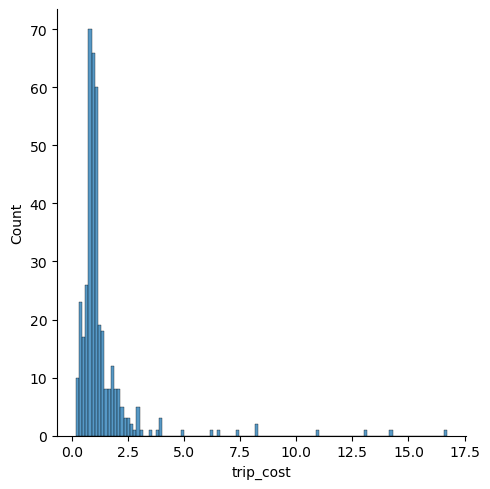

In [27]:
for column in numerical:
    sns.displot(numerical[column])
    plt.show()

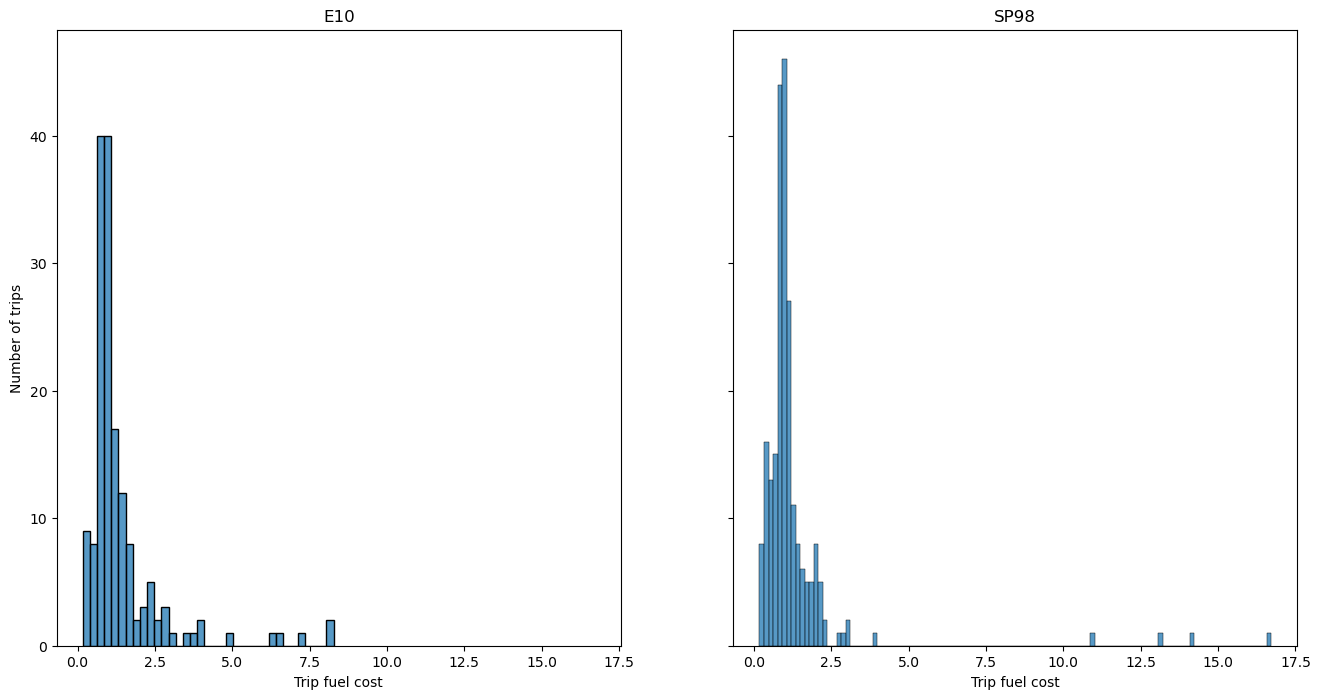

In [28]:
fig,axes = plt.subplots(1,2, figsize=(16,8), sharey=True, sharex=True)
e10 = data[data['gas_type']=='E10']
sp98 = data[data['gas_type']=='SP98']

sns.histplot(ax=axes[0], data=e10, x=e10['trip_cost'], label='E10').set(title='E10')
axes[0].set(xlabel='Trip fuel cost', ylabel='Number of trips')

sns.histplot(ax=axes[1], data=sp98, x=sp98['trip_cost'], label='SP98').set(title='SP98')
axes[1].set(xlabel='Trip fuel cost', ylabel='Number of trips')

plt.ylabel('Number of trips')

plt.show()